<a href="https://colab.research.google.com/github/AyU2345/mse-2-ai/blob/main/AI_MSE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:

              precision    recall  f1-score   support

        High       0.53      0.51      0.52        99
         Low       0.20      0.08      0.11        26
      Medium       0.43      0.55      0.48        75

    accuracy                           0.47       200
   macro avg       0.39      0.38      0.37       200
weighted avg       0.45      0.47      0.45       200



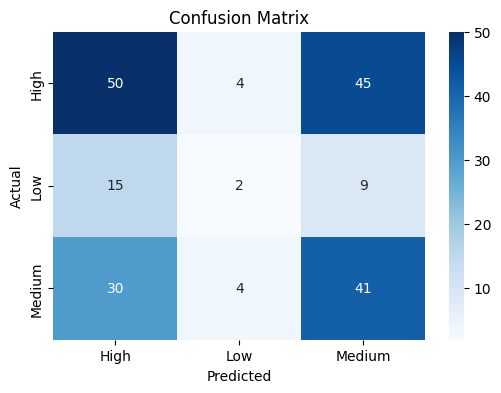

In [1]:
# Step 1: Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load Dataset (Option 1: Upload your dataset)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('your_file.csv')

# Step 3: OR Simulate a Dataset
data = {
    'Engine_Size': np.random.uniform(1.0, 6.0, 1000),
    'Cylinders': np.random.choice([4, 6, 8], 1000),
    'Fuel_Type': np.random.choice(['Petrol', 'Diesel', 'Electric', 'Hybrid'], 1000),
    'Fuel_Consumption': np.random.uniform(4.0, 20.0, 1000),
    'CO2_Emissions': np.random.randint(80, 400, 1000)
}
df = pd.DataFrame(data)

# Classify emissions into categories
def emission_category(co2):
    if co2 < 120:
        return 'Low'
    elif co2 < 250:
        return 'Medium'
    else:
        return 'High'

df['Emission_Category'] = df['CO2_Emissions'].apply(emission_category)

# Step 4: Preprocess Data
X = df[['Engine_Size', 'Cylinders', 'Fuel_Type', 'Fuel_Consumption']]
y = df['Emission_Category']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Fuel_Type'], drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
